<a href="https://colab.research.google.com/github/DeepaliDagar/Battle-of-Neighbourhoods/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

Importing csv file:

In [2]:
from google.colab import files 
uploaded=files.upload()

Saving stroke.csv to stroke.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['stroke.csv']))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.shape

(303, 14)

To get count of classes:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


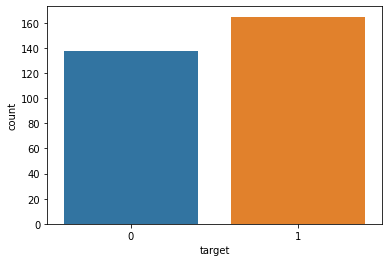

In [4]:
sns.countplot(df['target'])

In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


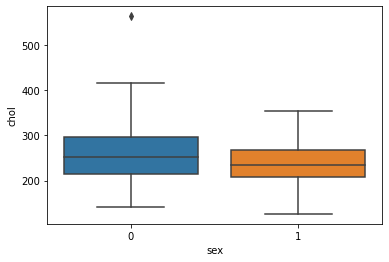

In [26]:
sns.boxplot(x=df['sex'],y=df['chol'])

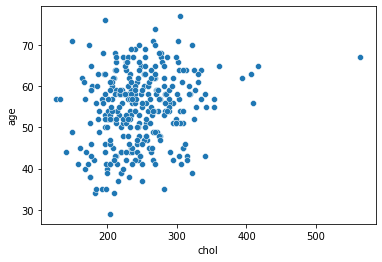

In [24]:
sns.scatterplot(data=df,x='chol',y='age')

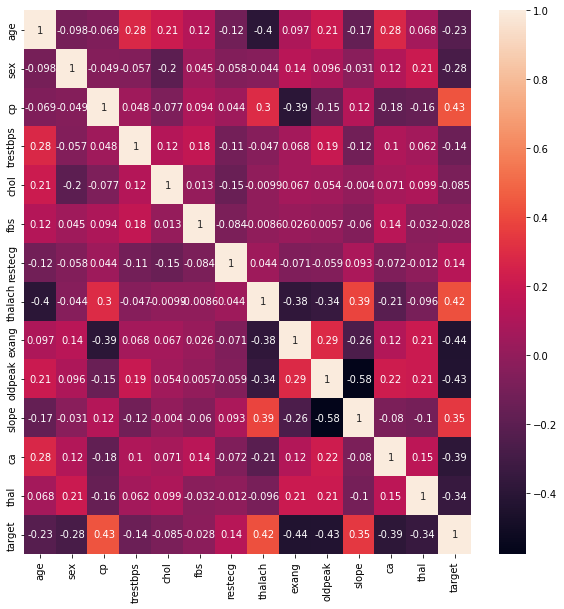

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Dividing features:

In [9]:
x= df.iloc[:,0:13].values 
y= df['target'].values  

Splitting the data into 75% training data and 25% testing data:

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

Scaling the data:

In [11]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  


**Calculating error for K values between 1 and 50 and finding best fit for k:**

In [14]:
error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Minimum error:- 0.13157894736842105 at K = 7


In [15]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [16]:
y_pred= classifier.predict(x_test)  


Confusion metrics to visualize actual values and predicted values:

In [17]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [18]:
cm


array([[26,  7],
       [ 3, 40]])

To check the score of our model:

In [19]:
accuracy_score(y_test, y_pred)

0.868421052631579

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.76      0.95      0.85        43

    accuracy                           0.80        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.82      0.80      0.79        76



Future aspects:
### The model made here is just the basic model and is built on a small dataset. To avoid overfitting we need to work on more data, and incase the imbalance between classes becomes greater than we need to handle it.